### Project Introduction

#### Title: Survival Analysis of Customer Churn in a Telecommunications Company

#### Introduction

Customer churn is a critical challenge faced by telecommunications companies, impacting their revenue and growth. Understanding the factors that contribute to customer churn and predicting churn behavior can help companies implement effective retention strategies and improve customer satisfaction. 

In this project, we aim to perform a survival analysis to investigate the churn behavior of customers in a telecommunications company. By analyzing the tenure (duration of customer retention) and identifying significant factors affecting churn, we can gain valuable insights into customer behavior and develop strategies to reduce churn rates.

#### Objectives

1. **Model Survival Time**: Analyze the survival time (tenure) of customers and identify the factors influencing their retention.
2. **Identify Key Factors**: Determine the demographic, account, and service-related variables that significantly impact customer churn.
3. **Provide Business Insights**: Offer actionable insights for the telecommunications company to enhance customer retention and improve service offerings.
4. **Robust Analysis**: Ensure the analysis is robust by handling outliers and using appropriate statistical methods.

#### Methodology

1. **Exploratory Data Analysis (EDA)**: 
   - Understand the data distribution and identify any data quality issues.
   - Handle missing values and outliers.
   - Summarize key statistics and visualize important relationships.

2. **Data Preprocessing**:
   - Encode categorical variables based on their levels.
   - Normalize or transform numerical variables if necessary.
   - Segregate the data into training and testing sets.

3. **Survival Analysis**:
   - Apply survival analysis techniques such as Kaplan-Meier estimator and Cox proportional hazards model to analyze the survival time of customers.
   - Evaluate the impact of different variables on customer churn.

4. **Model Evaluation**:
   - Compare model performance with and without outliers.
   - Use robust statistical methods to ensure the validity of the results.

5. **Business Insights and Recommendations**:
   - Interpret the results to provide actionable insights.
   - Recommend strategies for improving customer retention and reducing churn rates.


#### Purpose of the Analysis

The primary purpose of this analysis is to model the survival time (tenure) or churn time of customers, identify factors influencing customer churn, and provide actionable insights for improving customer retention strategies. This involves exploring the data, handling outliers, encoding categorical variables, and applying survival analysis techniques.

#### Conclusion

By conducting a thorough survival analysis on the customer churn data, this project aims to provide a comprehensive understanding of customer retention dynamics in the telecommunications industry. The insights derived from this analysis will help the company implement targeted strategies to retain valuable customers and improve overall business performance.


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
%matplotlib inline

### Data Overview

#### Dataset Description

The dataset contains information about customers of a telecommunications company, including demographic details, account information, and service usage. The primary goal is to analyze the survival time or churn time of these customers.

#### Columns and Their Descriptions

1. **CustomerID**: Unique identifier for each customer.
2. **Gender**: Gender of the customer (Male/Female).
3. **SeniorCitizen**: Indicates if the customer is a senior citizen (0: No, 1: Yes).
4. **Partner**: Indicates if the customer has a partner (Yes/No).
5. **Dependents**: Indicates if the customer has dependents (Yes/No).
6. **Tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Indicates if the customer has phone service (Yes/No).
8. **MultipleLines**: Indicates if the customer has multiple lines (Yes/No/No phone service).
9. **InternetService**: Type of internet service the customer has (DSL/Fiber optic/No).
10. **OnlineSecurity**: Indicates if the customer has online security service (Yes/No/No internet service).
11. **OnlineBackup**: Indicates if the customer has online backup service (Yes/No/No internet service).
12. **DeviceProtection**: Indicates if the customer has device protection service (Yes/No/No internet service).
13. **TechSupport**: Indicates if the customer has tech support service (Yes/No/No internet service).
14. **StreamingTV**: Indicates if the customer has streaming TV service (Yes/No/No internet service).
15. **StreamingMovies**: Indicates if the customer has streaming movies service (Yes/No/No internet service).
16. **Contract**: Type of contract the customer has (Month-to-month/One year/Two year).
17. **PaperlessBilling**: Indicates if the customer has paperless billing (Yes/No).
18. **PaymentMethod**: Payment method used by the customer (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
19. **MonthlyCharges**: The amount charged to the customer monthly.
20. **TotalCharges**: The total amount charged to the customer.
21. **Churn**: Indicates if the customer churned (Yes/No).

#### Key Insights

- **Demographic Information**: Includes gender, senior citizen status, and whether the customer has a partner or dependents.
- **Account Information**: Covers tenure, contract type, paperless billing, payment method, monthly charges, and total charges.
- **Services Information**: Details the types of services subscribed to by the customer, such as phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, and streaming movies.


In [2]:
# Connecting to the data
data = pd.read_csv('./Telco_Customer_churn.csv')

In [3]:
# Taking a sample from the data
data.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3623,9819-FBNSV,Male,1,Yes,No,37,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),72.25,2575.45,No
6940,2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),55.65,3880.05,No
2729,1143-NMNQJ,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.70,169.8,Yes
4956,3217-FZDMN,Female,1,No,No,8,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.45,742.95,Yes
1461,6234-PFPXL,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,No
965,9889-TMAHG,Male,1,No,No,8,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),100.30,832.35,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning
This section is for cleaning the data. It includes the following:
- **Missing data Analysis**,
- **Type Casting**,
- **Duplicates Removal** and
- **Outlier Detection and Investigation**

In [5]:
# customerID is not required for our analysis
data.drop(['customerID'],axis=1,inplace=True)

In [6]:
# Counting the number of missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values in the dataset.

In [7]:
# Checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We need to change the datatype for the `TotalCharges` from object to float

In [8]:
# Finding values that throw error
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

invalid_total_charges = data[data['TotalCharges'].isna()]
# Number of missing values
invalid_total_charges.count()

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges         0
Churn               11
dtype: int64

In [9]:
# Type casting `SeniorCitizen` as object for future help
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [10]:
# Removing these values
data = data[~data['TotalCharges'].isna()]

In [11]:
# Find and remove duplicates
data.drop_duplicates(inplace=True)

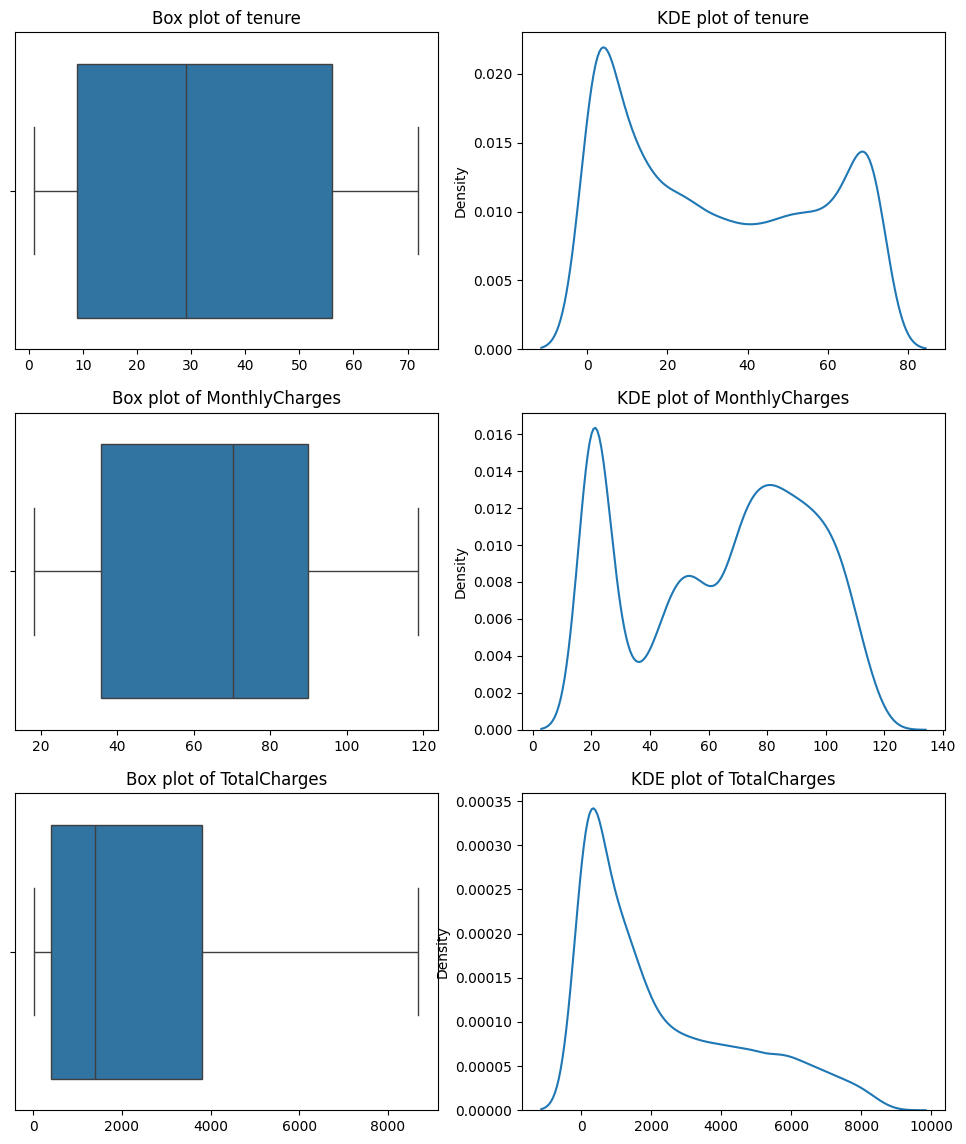

In [12]:
# Checking for outliers

# Approach 1 Boxplots
fig, ax = plt.subplots(3,2,figsize=(12,14))
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data,x=numerical_features[i],ax = ax[i,0]).set(title=f'Box plot of {numerical_features[i]}',xlabel=None)
    sns.kdeplot(data=data,x=numerical_features[i],ax = ax[i,1]).set(title=f'KDE plot of {numerical_features[i]}',xlabel=None)

# plt.savefig('dist of num vars.jpg')

Here we see that there is no points outside the whiskers which tells us that there is no outliers as of now. The distribution of 
the `TotalCharges` is positively skewed as well.



### KDE Plots 

KDE plots show the distribution of the data as a continuous smooth curve, which helps to visualize the density and detect the presence of multiple modes (peaks). 

  

- #### Tenure: 

  

The distribution is bimodal, with two distinct peaks around 0-10 and 60-70. 

This indicates two common tenure periods among customers, possibly new customers and long-term customers. 

- #### MonthlyCharges: 

  

The distribution has multiple peaks, indicating a mix of different monthly charge values. 

There is a prominent peak around 20-30 and smaller peaks around 80-90 and 100-110. 

- #### TotalCharges: 

  

The distribution is right-skewed with a long tail extending to higher values. 

Most customers have lower total charges, with a few having very high total charges. 

#### Interpretation and Insights 

- Tenure: The bimodal distribution suggests distinct customer segments with short and long tenure periods. It may be useful to investigate factors contributing to these segments. 

- MonthlyCharges: The varied peaks in the monthly charges indicate that customers are paying different amounts, which could correlate with different service plans or usage patterns. 

- TotalCharges: The right-skewed distribution indicates that while most customers have relatively low total charges, there are a few customers with significantly higher total charges. This could be due to longer tenure or higher monthly charges. 

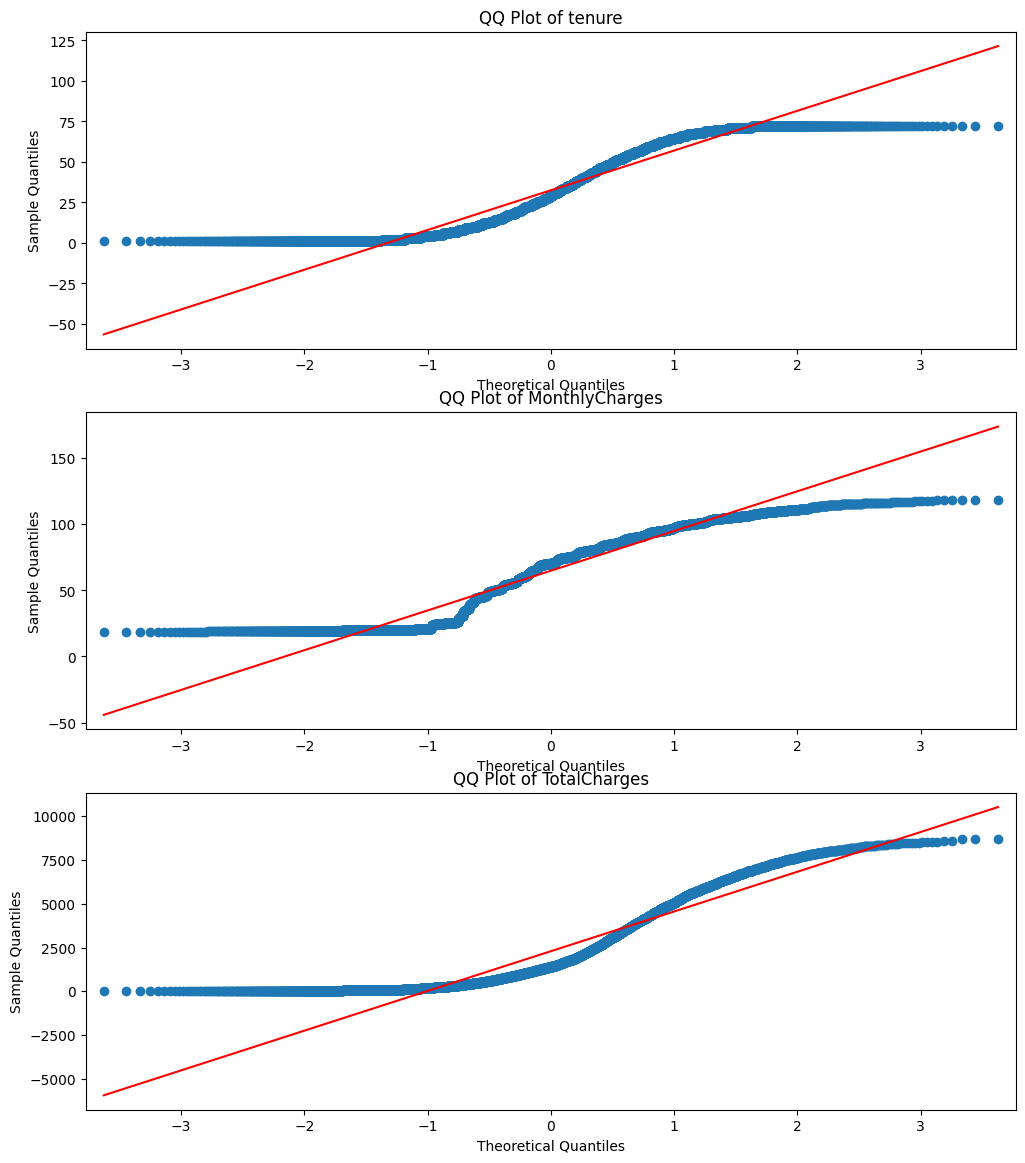

In [13]:
# Approach 2: Z-scores
# First we test whether the variables are normally distributed or not (through visual inspection of the kde it looks to be non-normal)

# Q-Q Plot
fig, ax = plt.subplots(3,1,figsize=(12,14))
for i, feature in enumerate(numerical_features):
    sm.qqplot(data[feature],line='s',ax=ax[i])
    ax[i].set_title(f'QQ Plot of {feature}')
# plt.savefig('./vizes/QQPlot.jpg')

## QQ Plot Interpretation

### Q-Q Plot of Tenure:

Straight Line: The red line represents the expected distribution if the data were perfectly normally distributed.
Data Points: The blue points represent the actual data.
Interpretation: The data points deviate from the red line, especially at the tails (both ends). This indicates that tenure is not normally distributed, showing heavy tails and skewness.

### Q-Q Plot of MonthlyCharges:

Straight Line: As above, the red line is the theoretical normal distribution.
Data Points: The blue points again represent the actual data.
Interpretation: The points show deviation from the red line, especially in the lower and upper tails, indicating that MonthlyCharges is not normally distributed. The middle portion aligns better, suggesting some degree of normality but with significant outliers.

### Q-Q Plot of TotalCharges:

Straight Line: The red line represents the theoretical normal distribution.
Data Points: The blue points are the actual data.
Interpretation: The points deviate significantly from the red line throughout, particularly at the tails. This indicates that TotalCharges is not normally distributed and is right-skewed with outliers.

### Implications

Non-normality: All three variables (tenure, MonthlyCharges, and TotalCharges) deviate from the normal distribution. This non-normality suggests that methods assuming normality, such as Z-scores for outlier detection, may not be appropriate.

Heavy Tails and Skewness: The deviations indicate the presence of heavy tails and skewness, which can impact statistical analyses and the detection of outliers.

In [14]:
# Approach 3: Multivariate Outlier Detection
# Using Mahalanobis Distance (Robust)

# Function for mahalanobis_distance
def mahalanobis_distances(X, mean, cov):
    diff = X - mean
    md = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov)), diff.T).diagonal())
    return md 

In [15]:


# Robust covariance estimator
robust_cov = MinCovDet().fit(data[numerical_features])

# Calculate Mahalanobis distances using robust estimations
mean_vector = robust_cov.location_
cov_matrix = robust_cov.covariance_
data['RobustMahalanobisDist'] = mahalanobis_distances(data[numerical_features].values, mean_vector, cov_matrix)

# Determine the threshold for outliers (95% confidence interval)
threshold = chi2.ppf(0.95, len(numerical_features))

# Identify outliers
data['RobustOutlier'] = data['RobustMahalanobisDist'] > threshold

# Filter outliers
outliers_data_robust = data[data['RobustOutlier']]

print(f"Number of multivariate outliers detected using robust Mahalanobis distance: {outliers_data_robust.shape[0]}")
outliers_data_robust[['tenure', 'MonthlyCharges', 'TotalCharges', 'RobustMahalanobisDist']]


Number of multivariate outliers detected using robust Mahalanobis distance: 354


,tenure,MonthlyCharges,TotalCharges,RobustMahalanobisDist
15,69,113.25,7895.15,8.379111
59,72,107.50,7853.70,7.942400
104,68,110.00,7611.85,7.853595
109,72,19.40,1363.25,9.688419
127,72,23.55,1723.95,8.788861
...,...,...,...,...
6880,72,25.20,1787.35,8.662194
6910,70,114.60,7882.50,8.112117
6942,68,20.00,1396.00,8.757220
7000,67,20.55,1343.40,8.712896


In [16]:
# Description of the outliers
outliers_data_robust[['tenure', 'MonthlyCharges', 'TotalCharges', 'RobustMahalanobisDist']].describe()

,tenure,MonthlyCharges,TotalCharges,RobustMahalanobisDist
count,354.000000,354.000000,354.000000,354.000000
mean,69.799435,56.094915,3973.189548,8.668959
std,2.933039,44.378972,3197.533223,0.524444
min,60.000000,19.100000,1093.000000,7.815808
25%,69.000000,20.050000,1398.075000,8.257980
50%,71.000000,24.925000,1768.175000,8.612187
75%,72.000000,111.937500,7959.962500,9.071121
max,72.000000,118.750000,8684.800000,9.987108


### Summary: Deciding Whether to Keep or Exclude Outliers in Survival Analysis

Here the outliers detected by the RMD method are the long term customers with high and low monthly charges. 

#### Reasons to Keep the Outliers

1. **Capturing True Customer Behavior**:
   - **Real-world Scenarios**: Outliers might represent genuine customer behaviors (e.g., long-term loyalty, high-value customers).
   - **Full Spectrum**: Ensures the model captures the entire range of customer behaviors.

2. **Model Robustness**:
   - **Generalization**: Models handling outliers well can generalize better to new data.
   - **Resilience**: Including outliers makes the model more resilient to unusual but significant segments.

3. **Business Insights**:
   - **High-value Customers**: Insights into long-term, high-paying customers can drive targeted retention and upselling strategies.
   - **Anomaly Detection**: Helps in identifying and understanding unique customer segments.

#### Reasons Against Keeping the Outliers

1. **Model Stability**:
   - **Influence on Parameters**: Outliers can disproportionately affect model parameters, leading to biased or unstable estimates.
   - **Assumption Violations**: Outliers can violate statistical assumptions, leading to invalid results.

2. **Data Quality and Noise**:
   - **Potential Errors**: Outliers might be data entry errors or noise, degrading model performance.
   - **Overfitting**: Keeping outliers can lead to overfitting, reducing predictive performance on new data.

#### Structured Analysis

##### Why You Are Correct to Keep Outliers

1. **Real-world Representation**: Models churn time more accurately by including real-world scenarios.
2. **Customer Segmentation**: Captures critical customer segments that behave differently from the majority.
3. **Model Robustness**: Creates a more robust model that generalizes well to the entire customer base, including edge cases.

##### Why You Might Be Wrong

1. **Statistical Assumptions**: Outliers can violate assumptions of survival analysis methods, leading to biased results.
2. **Parameter Bias**: Outliers can skew parameter estimates, resulting in misleading conclusions.
3. **Data Integrity**: Outliers might be data entry errors or anomalies not representing actual customer behavior.

### Recommendation

1. **Validate Outliers**: Ensure outliers are genuine customer behaviors, not data entry errors.
2. **Robust Methods**: Use robust statistical methods to handle outliers without disproportionate influence.
3. **Sensitivity Analysis**: Compare models with and without outliers to understand their impact on model performance.

### Conclusion

Keeping the outliers seems beneficial for capturing the full range of customer behaviors and ensuring a comprehensive analysis. Be mindful of their impact on model assumptions and stability. Use robust methods and validate the integrity of the outliers to mitigate potential downsides. 


In [17]:
# We drop this column as it not required any longer
data.drop('RobustMahalanobisDist',axis=1,inplace=True)

## Exploratory Data Analysis

Here we look at the various univariate and bivariate relationships of the variables given.

In [18]:
# Segregating the variables in terms of datatype
numerical_columns = data.select_dtypes(include=['float64','int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [25]:
# Getting an idea of the unique values of the string columns and code them accordingly.
# Print unique values for each string column
for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'gender':
['Female' 'Male']


Unique values in column 'SeniorCitizen':
[0 1]


Unique values in column 'Partner':
['Yes' 'No']


Unique values in column 'Dependents':
['No' 'Yes']


Unique values in column 'PhoneService':
['No' 'Yes']


Unique values in column 'MultipleLines':
['No phone service' 'No' 'Yes']


Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']


Unique values in column 'OnlineSecurity':
['No' 'Yes' 'No internet service']


Unique values in column 'OnlineBackup':
['Yes' 'No' 'No internet service']


Unique values in column 'DeviceProtection':
['No' 'Yes' 'No internet service']


Unique values in column 'TechSupport':
['No' 'Yes' 'No internet service']


Unique values in column 'StreamingTV':
['No' 'Yes' 'No internet service']


Unique values in column 'StreamingMovies':
['No' 'Yes' 'No internet service']


Unique values in column 'Contract':
['Month-to-month' 'One year' 'Two year']


Unique values in column 'PaperlessBilling':


In [35]:
# Segregating the columns for number of unique values

def seggregate_for_levels(data,categorical_columns):
    columns_by_levels = {}
    
    # Count unique values and categorize columns
    for col in categorical_columns:
        num_unique = data[col].nunique()
        if num_unique in columns_by_levels:
            columns_by_levels[num_unique].append(col)
        else:
            columns_by_levels[num_unique] = [col]
    return columns_by_levels

In [59]:
# Constructing summary table for all
def construct_summary_table(cat_data,columns):
    column_by_levels = seggregate_for_levels(cat_data,columns)
    summary_df = {}

    for levels, cols in columns_by_levels.items():
        summary_table=pd.DataFrame()
        summary_df[levels] = []
        for col in cols:
            summary = data[col].value_counts(normalize=False).to_frame().T
            summary_percent = (data[col].value_counts(normalize=True).to_frame().T) * 100
            summary_table = pd.concat([summary, summary_percent], keys=['Count', 'Percentage'])
            summary_df[levels].append(summary_table)
        # del summary_table

    return summary_df
    

In [66]:
diction = construct_summary_table(data,categorical_columns)
for levels, cols in diction.items():
    for i in range(len(cols)):
        print(diction[levels][i])
        print('\t')

gender                       Male      Female
Count      count       3535.00000  3475.00000
Percentage proportion    50.42796    49.57204
	
SeniorCitizen                    0            1
Count      count       5869.000000  1141.000000
Percentage proportion    83.723252    16.276748
	
Partner                         No          Yes
Count      count       3617.000000  3393.000000
Percentage proportion    51.597718    48.402282
	
Dependents                      No          Yes
Count      count       4911.000000  2099.000000
Percentage proportion    70.057061    29.942939
	
PhoneService                   Yes          No
Count      count       6330.000000  680.000000
Percentage proportion    90.299572    9.700428
	
PaperlessBilling               Yes           No
Count      count       4158.000000  2852.000000
Percentage proportion    59.315264    40.684736
	
Churn                           No          Yes
Count      count       5153.000000  1857.000000
Percentage proportion    73.509272   

### Interpretation of Categorical Variable Distribution

####  Overall Insights

- **Demographics**: The customer base is fairly balanced in terms of gender, with a higher proportion of younger (non-senior) citizens and customers without dependents.
- **Services**: Most customers have phone service, and a significant portion prefers fiber optic internet. However, optional services like online security, backup, and tech support are less popular.
- **Customer Behavior**: More than half of the customers prefer month-to-month contracts and paperless billing, suggesting a tendency toward flexibility and digital solutions.
- **Churn**: About one-quarter of the customer base has churned, which is a significant figure that warrants deeper analysis in the study.

This overview provides a foundation for further analysis, especially in understanding the factors that might influence customer churn.

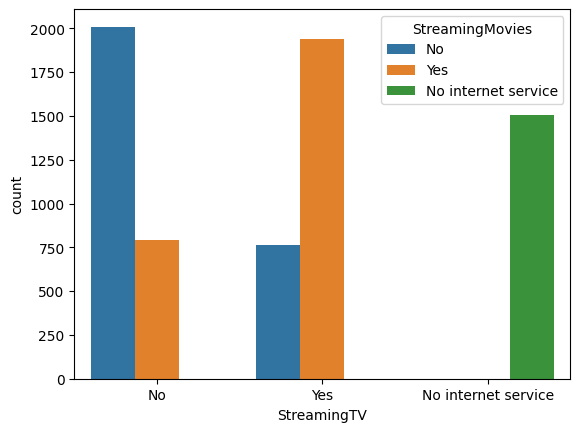

In [67]:
# For people who stream movies do they stream tv as well
sns.countplot(data,x='StreamingTV',hue='StreamingMovies')
# plt.savefig('./vizes/StrTVvStrMv.jpg')

There looks to be a very high correlation of those who stream TV also stream Movies, which makes a lot of sense as if you stream TV then it is very likely that you will stream movies as well.

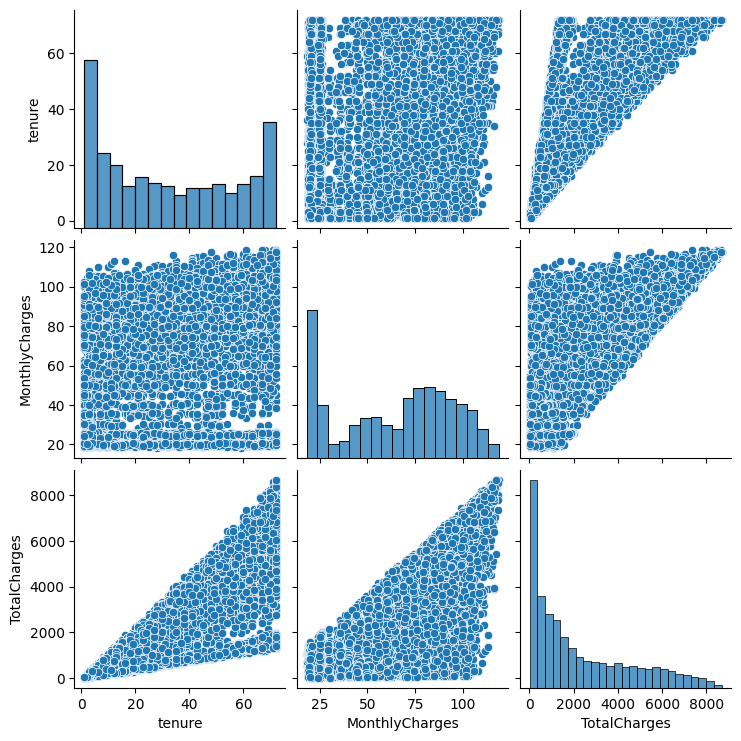

In [68]:
# Exploring the bivariate relations
sns.pairplot(data[numerical_columns])
# plt.savefig('./vizes/Pairplot.jpg')

This doesnot give a good visualization for our data, so we try out a few alternatives for understanding the data better.

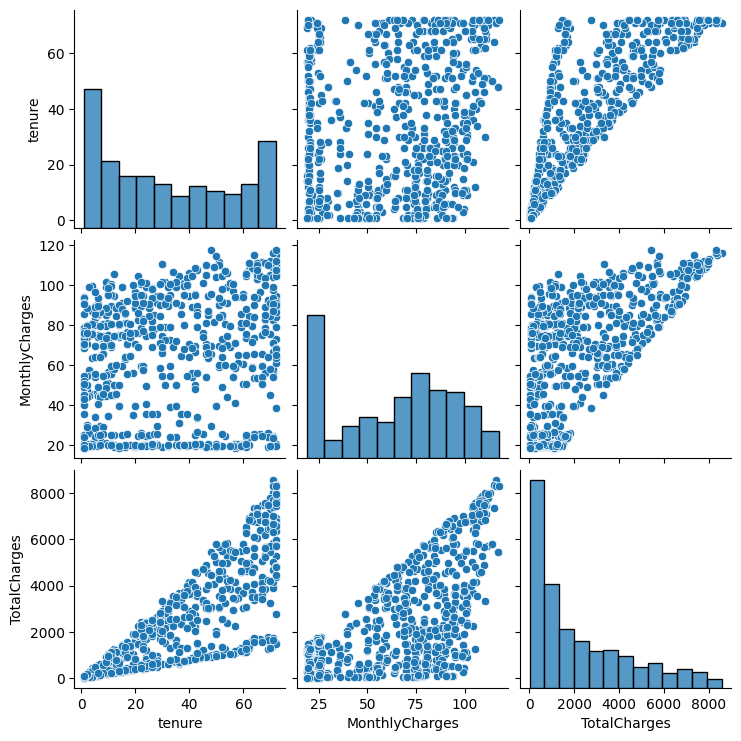

In [80]:
# Alternate 1: Taking a small sample

sample_size = math.ceil(data.shape[0]*0.1)
df_sample = data.sample(sample_size)
sns.pairplot(df_sample[numerical_columns])

'\nNext Day: \n1. Plot the hue for different categories \n2. Generate a report for EDA using pandas-profiling or Autoviz or sweetviz\n3. Feature Engineering : Label categroical variables and reduce dimensionality\n'

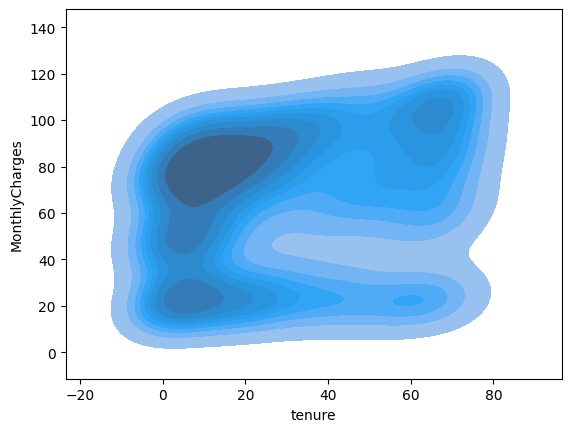

In [88]:
# Alternate 2: Alternate 1 + Plotting a KDE plot
sns.kdeplot(df_sample,x='tenure',y='MonthlyCharges',fill=True)

'''
Next Day: 
1. Plot the hue for different categories 
2. Generate a report for EDA using pandas-profiling or Autoviz or sweetviz
3. Feature Engineering : Label categorical variables and reduce dimensionality
'''

## Feature Engineering

Here we extract information from the given data and make variables to help in our analysis.

In [22]:
# Here the Churn Data can be thought of as the censored indicator, Yes: uncensored and No: Censored
